<a href="https://colab.research.google.com/github/PurveshBaghele/ML/blob/master/roadSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [139]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random


In [0]:
np.random.seed(0)

In [142]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)
  
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)
  
X_train, Y_train =train_data['features'],train_data['labels']
X_val, Y_val =val_data['features'],val_data['labels']
X_test, Y_test =test_data['features'],test_data['labels']
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

  

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

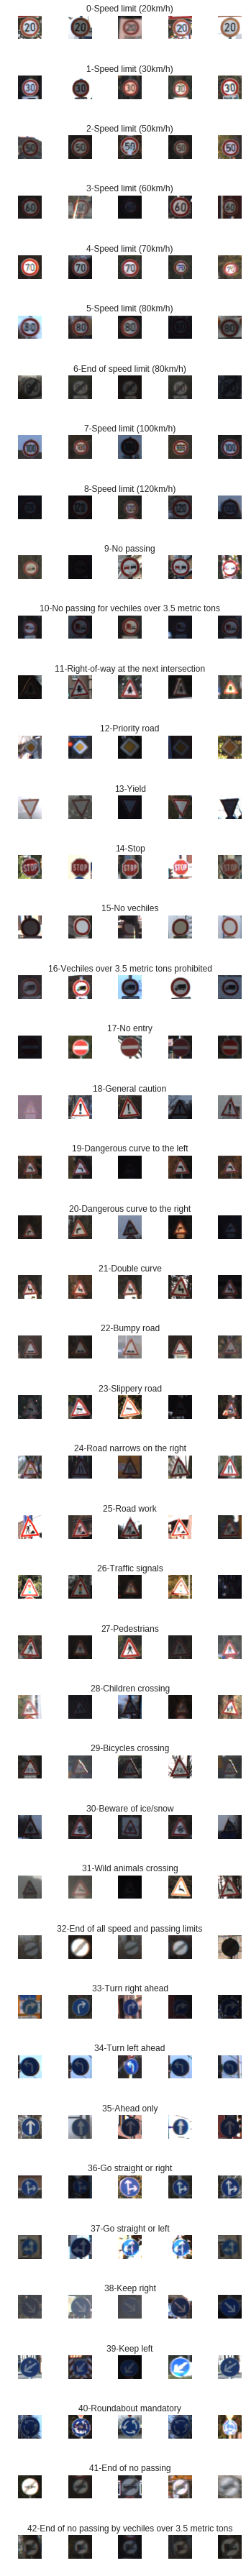

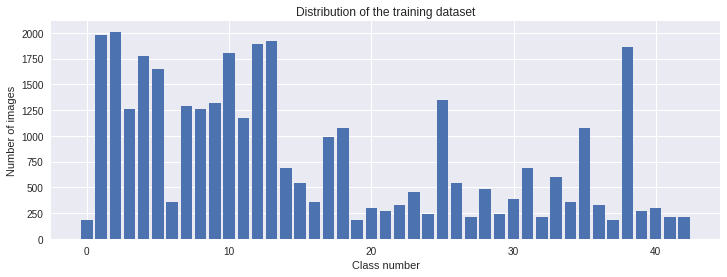

In [143]:
data =pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[Y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ '-'+ row['SignName'])
            num_of_samples.append(len(x_selected))


print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(34799, 32, 32, 3)
23


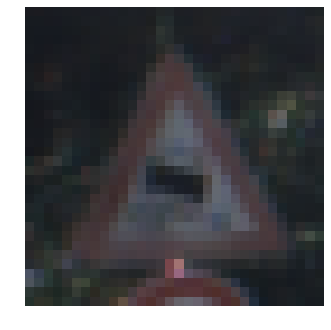

In [144]:
import cv2

plt.imshow(X_train[2002])
plt.axis('off')
print(X_train.shape)
print(Y_train[2002])

In [0]:
#preprocessing starts here

def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

#histogram equalization enhances contrast of the image which helps in better feature extraction
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

def preprocessing(img):
  img = equalize(grayscale(img))
  img = img/255
  return img

In [146]:
'''img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
'''



"img = grayscale(X_train[1000])\nplt.imshow(img)\nplt.axis('off')\n"

In [147]:
'''img = equalize(img)
plt.imshow(img)
plt.axis('off')
'''

"img = equalize(img)\nplt.imshow(img)\nplt.axis('off')\n"

In [0]:
X_train = np.array(list(map(preprocessing,X_train)))
X_val = np.array(list(map(preprocessing,X_val)))
X_test = np.array(list(map(preprocessing,X_test)))

(-0.5, 31.5, 31.5, -0.5)

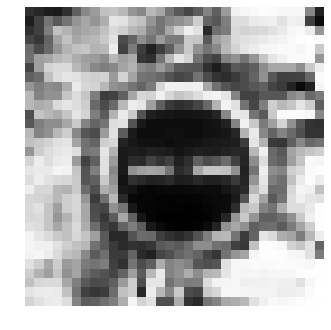

In [149]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')


In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)

In [0]:
Y_train = to_categorical(Y_train,43)
Y_val = to_categorical(Y_val,43)
Y_test = to_categorical(Y_test,43)

In [0]:
#creation of model

def leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43,activation = 'softmax'))
  
  model.compile(Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model
  

In [0]:

def modified_leNet_model():
  model = Sequential()
  
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))
  
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  
  
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43,activation = 'softmax'))
  
  model.compile(Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model
  

In [154]:
model = modified_leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 30)          0         
__________

In [155]:
history = model.fit(X_train,Y_train,epochs = 12,validation_data = (X_val,Y_val), batch_size = 500,verbose=1,shuffle='true')

Train on 34799 samples, validate on 4410 samples
Epoch 1/12
34799/34799 [==============================] - 6s 162us/step - loss: 2.6833 - acc: 0.2869 - val_loss: 0.9858 - val_acc: 0.7293
Epoch 2/12
34799/34799 [==============================] - 5s 135us/step - loss: 0.8489 - acc: 0.7375 - val_loss: 0.3618 - val_acc: 0.8957
Epoch 3/12
34799/34799 [==============================] - 5s 135us/step - loss: 0.4589 - acc: 0.8577 - val_loss: 0.2340 - val_acc: 0.9268
Epoch 4/12
34799/34799 [==============================] - 5s 136us/step - loss: 0.3118 - acc: 0.9031 - val_loss: 0.1798 - val_acc: 0.9444
Epoch 5/12
34799/34799 [==============================] - 5s 136us/step - loss: 0.2412 - acc: 0.9245 - val_loss: 0.1356 - val_acc: 0.9569
Epoch 6/12
34799/34799 [==============================] - 5s 135us/step - loss: 0.1987 - acc: 0.9399 - val_loss: 0.1155 - val_acc: 0.9628
Epoch 7/12
34799/34799 [==============================] - 5s 136us/step - loss: 0.1723 - acc: 0.9461 - val_loss: 0.1123 - v

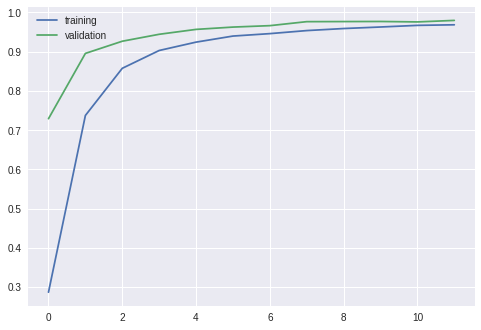

In [156]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])


In [157]:
score = model.evaluate(X_test,Y_test,verbose=1)
print('Test score: ',score[0])
print('Accuracy: ',score[1])

12630/12630 [==============================] - 1s 118us/step
Test score:  0.13964662007893114
Accuracy:  0.9593032462863061


In [171]:
#fetch image

import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
rr = requests.get(url, stream=True)
img = Image.open(rr.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))




OSError: ignored

In [166]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)



error: ignored

In [0]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
print("predicted sign: "+ str(model.predict_classes(img)))